In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
df_microdados = pd.read_csv('MICRODADOS_ENEM_2023.csv', chunksize=100000, sep=';', encoding='ISO-8859-1').get_chunk()

In [ ]:
df_microdados

In [ ]:
df_microdados.columns.values

In [ ]:
selectedColumns = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

In [ ]:
selectedNotesColumns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 
       'NU_NOTA_REDACAO']

In [ ]:
df_selectedColumns = df_microdados.filter(items=selectedColumns)

In [ ]:
df_data_count = df_selectedColumns.head(10000)

In [ ]:
get_city = df_data_count['NO_MUNICIPIO_PROVA']
get_city.value_counts()

In [ ]:
get_age = df_data_count['TP_FAIXA_ETARIA']

<Axes: >

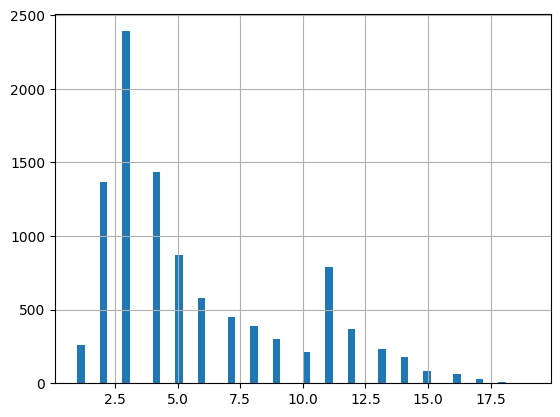

In [68]:
get_age.hist(bins=60)

In [ ]:
df_data_count.corr(numeric_only=True)['NU_NOTA_MT']

In [66]:
df_data_notes = df_microdados.filter(items=selectedNotesColumns)

<Axes: >

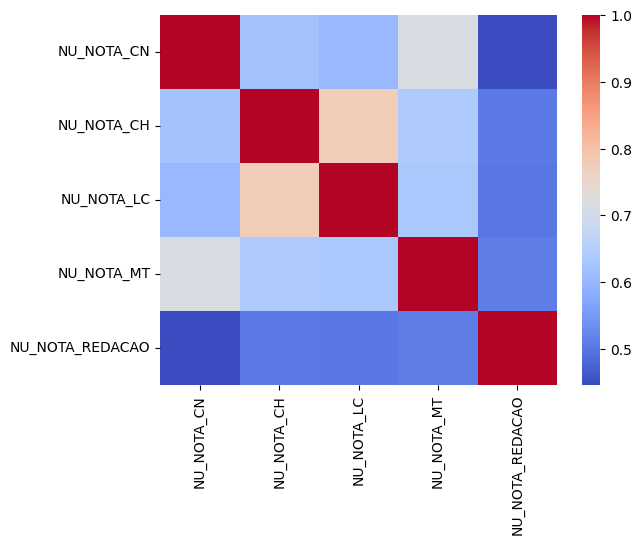

In [67]:
sns.heatmap(df_data_notes.corr(numeric_only=True), annot=False, cmap='coolwarm', fmt=".2f")
